# Lab 2

Kalyn Howes

10.1.2021

Gain familiarity with data import and plotting using 'adult.data'

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [72]:
adults = pd.read_csv('data/adult.data', header=None, skipinitialspace = True,
         names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [73]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

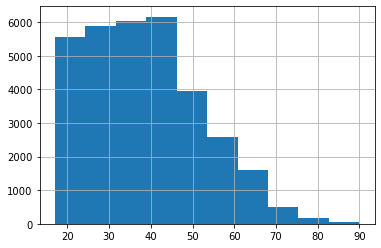

In [74]:
# TESTING: histogram the ages of these adults - What does the distribution of ages look like?
adults['age'].hist()

# 4)

In [133]:
# a) Rank each occupation in terms of most likely to earn more than $50k
# need to find which occupations have most incomes >50k
# find ratio of that number to total in that occupation
# sort the occupations by highest ratio
df = adults[['occupation', 'income']][adults['income'] == '>50K']
df = df.groupby('occupation').count()
df = df.sort_values(['income'], ascending = False)
print(df)

# cant do this with strings?
# adults['occupation'].values_count()

                   income
occupation               
Exec-managerial      1968
Prof-specialty       1859
Sales                 983
Craft-repair          929
Adm-clerical          507
Transport-moving      320
Tech-support          283
Machine-op-inspct     250
Protective-serv       211
?                     191
Other-service         137
Farming-fishing       115
Handlers-cleaners      86
Armed-Forces            1
Priv-house-serv         1


In [76]:
# b) Calculate the median age of people who make more and less than $50k.
under50k = adults[adults['income'] == '<=50K']
above50k = adults[adults['income'] == '>50K']

medage_under50k = np.median(under50k['age'])
# medage_under50k = (under50k['age']).median()
medage_above50k = np.median(above50k['age'])


print(f'Median age of people who make LESS than 50k: {medage_under50k}')
print(f'Median age of people who make MORE than 50k: {medage_above50k}')


Median age of people who make LESS than 50k: 34.0
Median age of people who make MORE than 50k: 44.0


In [77]:
# b) Calculate the medians for each again, but now split apart by the sex of the adults.
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

under50k_M = males[males['income'] == '<=50K']['age'].median()
under50k_F = females[females['income'] == '<=50K']['age'].median()
print(f'Median age for females with an income <= 50k: {under50k_F}')
print(f'Median age for males with an income <= 50k: {under50k_M}')

above50k_M = males[males['income'] == '>50K']['age'].median()
above50k_F = females[females['income'] == '>50K']['age'].median()
print(f'Median age for females with an income > 50k: {above50k_F}')
print(f'Median age for males with an income > 50k: {above50k_M}')

Median age for females with an income <= 50k: 34.0
Median age for males with an income <= 50k: 35.0
Median age for females with an income > 50k: 41.0
Median age for males with an income > 50k: 44.0


In [78]:
# c) Calculate the mean and median number of years of education held by adults who make more and less than $50k.
under50k = adults[adults['income'] == '<=50K']
above50k = adults[adults['income'] == '>50K']

# median numbers of education
meded_under50k = np.median(under50k['education-num'])
meded_above50k = np.median(above50k['education-num'])

# mean numbers of education
meaned_under50k = np.mean(under50k['education-num'])
meaned_above50k = np.mean(above50k['education-num'])

print(f'Median years of education of people who make LESS than 50k: {meded_under50k}')
print(f'Mean years of education of people who make LESS than 50k: {meaned_under50k}')
print(f'Median years of education of people who make MORE than 50k: {meded_above50k}')
print(f'Mean years of education of people who make MORE than 50k: {meaned_above50k}')

Median years of education of people who make LESS than 50k: 9.0
Mean years of education of people who make LESS than 50k: 9.595064724919094
Median years of education of people who make MORE than 50k: 12.0
Mean years of education of people who make MORE than 50k: 11.611656676444332


Text(0.5, 1.0, 'Years of School & Income Level')

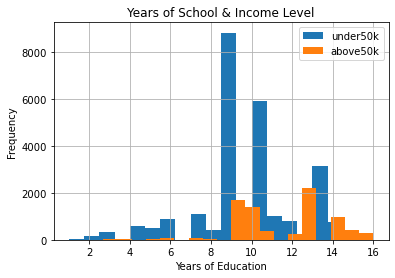

In [79]:
# d) Plot a histogram to see the distribution of years of school held by adults who make more and less than $50k. 
under50k['education-num'].hist(bins=20, legend=True)
above50k['education-num'].hist(bins=20, legend=True)
plt.legend(['under50k', 'above50k'])
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.title('Years of School & Income Level')

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

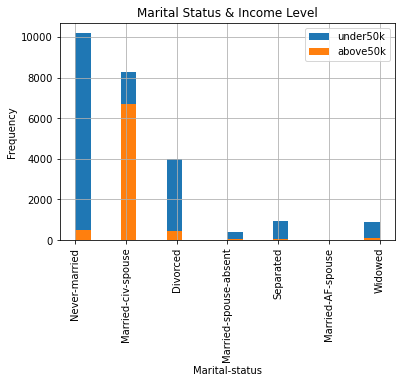

In [106]:
# Do the same, but differentiating between various attributes (e.g. what does the histogram look like if we 
# separate by other attributes such as gender, age (you can choose a threshold), etc.)?

# getting names to create x-axis for next graph
print(adults['marital-status'].unique())

under50k['marital-status'].hist(bins=20, legend=True)
above50k['marital-status'].hist(bins=20, legend=True)
plt.legend(['under50k', 'above50k'])
plt.xlabel('Marital-status')
plt.ylabel('Frequency')
plt.title('Marital Status & Income Level')

# bars = ('NM', 'MCS', 'D', 'MSA', 'S', 'MAS', 'W')
# x_pos = np.arange(len(bars))
# put created names on x axis
# plt.xticks(x_pos, bars)

# or just turn the longer names
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Age & Income Level')

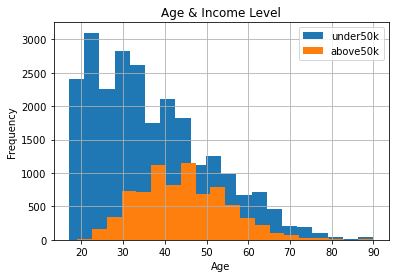

In [81]:
# e) Plot a histogram to see the distribution of ages of adults who make more and less than $50k. 
under50k['age'].hist(bins=20, legend=True)
above50k['age'].hist(bins=20, legend=True)
plt.legend(['under50k', 'above50k'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age & Income Level')

Text(0.5, 1.0, 'Age & Sex for <=50K Income Level')

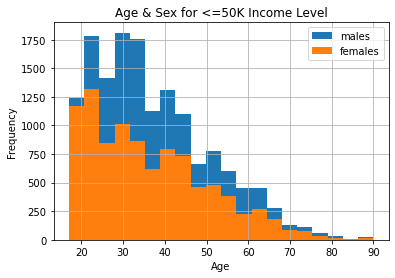

In [82]:
# Do the same, but differentiating between various attributes (e.g. what does the histogram look like
# if we separate by other attributes such as gender, age (you can choose a threshold), etc.)?
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

males[males['income'] == '<=50K']['age'].hist(bins=20, legend=True)
females[females['income'] == '<=50K']['age'].hist(bins=20, legend=True)
plt.legend(['males', 'females'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age & Sex for <=50K Income Level')

# 5)

Text(0.5, 0, 'Marital Status')

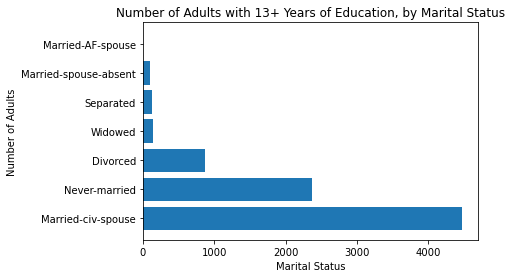

In [103]:
# a) Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship.
# x-axis does not have a specific order
df = adults[['marital-status','education-num']][adults['education-num'] >= 13]
df = df.value_counts('marital-status')

df.values

plt.barh(list(df.keys()), df)
plt.title("Number of Adults with 13+ Years of Education, by Marital Status")
plt.ylabel("Number of Adults")
plt.xlabel("Marital Status")

<AxesSubplot:title={'center':'Age vs. Hours Worked Per Week'}, xlabel='Age', ylabel='Hours Worked Per Week'>

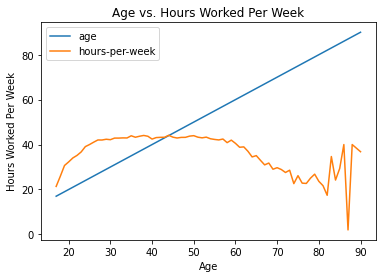

In [84]:
# b) Plot at least one line plot that shows a trend, where the x-axis variable manifests fully across the plot domain
# show age vs hours-per-week
df = adults[['age', 'hours-per-week']]
x = adults['age']
y = adults['hours-per-week']
plot1 = adults.groupby('age')[['age', 'hours-per-week']].mean()
plot1.plot.line(xlabel = 'Age', ylabel = 'Hours Worked Per Week', title = 'Age vs. Hours Worked Per Week')

Text(0.5, 1.0, 'Years of Education of Black Adults')

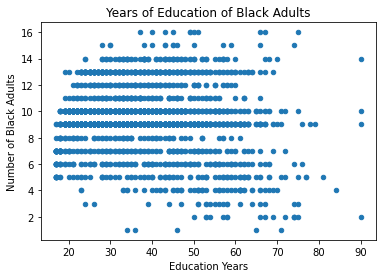

In [85]:
# c) Plot at least one scatter plot of the data that suggests a relationship between two discrete variables, 
# where the x-axis has an inter-related progression (amount, cost, process, etc.) but is not
# fully/evenly observed across the plot domain
plot1 = adults[['age', 'education-num']][adults['race'] == "Black"]
plot1.plot.scatter(x = 'age', y = 'education-num')
plt.xlabel("Education Years")
plt.ylabel("Number of Black Adults")
plt.title("Years of Education of Black Adults")

Text(0.5, 1.0, 'Hours of Work / Week & Native Country')

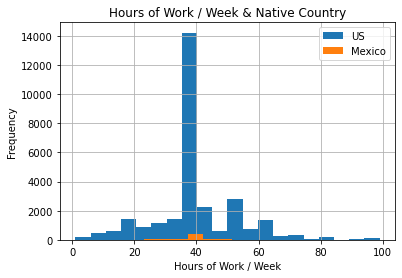

In [86]:
# d) Plot a histogram of a quantity that varies across the x-axis domain, but where we would like to
# consider a general distribution, rather than individual observations

# if there was actually sufficient data this might be interesting...
US = adults[adults['native-country'] == 'United-States']
Mexico = adults[adults['native-country'] == 'Mexico']

US['hours-per-week'].hist(bins=20, legend=True)
Mexico['hours-per-week'].hist(bins=20, legend=True)
plt.legend(['US', 'Mexico'])
plt.xlabel('Hours of Work / Week')
plt.ylabel('Frequency')
plt.title('Hours of Work / Week & Native Country')

# 6
Using pivoting, plotting, sorting, etc., attempt to answer the following questions with the data. Record
your responses, with clearly written text and visual examples, in your notebook. Clearly explain any
decisions or assumptions you had to make to answer each. Be sure to consider counter-arguments to
your conclusions and address them in your responses.

Text(0.5, 1.0, 'Age & Sex for >50K Income Level')

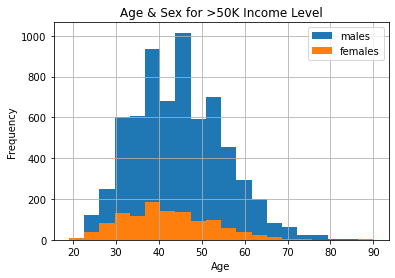

In [87]:
# a) What is the relationship between between gender and whether a person makes more than $50k?
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

males[males['income'] == '>50K']['age'].hist(bins=20, legend=True)
females[females['income'] == '>50K']['age'].hist(bins=20, legend=True)
plt.legend(['males', 'females'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age & Sex for >50K Income Level')

Looking at the bar graph above, it is obvious there are fewer females than males who have an income level of over 50k
a year. However, this graph could be misleading depending on the number of males and females who were sampled. If far more males were sampled than females, it could explain the results of the graph. Instead, we may want to look at the ratio of the number males and females who earn more than 50K to the number of males and females sampled.

In [88]:
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']
print(f"Number of males sampled: {len(males)}\nNumber of females sampled: {len(females)}")
print(f"Number of males who earn >50k: {len(males[males['income'] == '>50K'])}")
print(f"Number of males who earn >50k: {len(females[females['income'] == '>50K'])}")

print(f"Male ratio: {len(males[males['income'] == '>50K']) / len(males)}")
print(f"Female ratio: {len(females[females['income'] == '>50K']) / len(females)}")

Number of males sampled: 21790
Number of females sampled: 10771
Number of males who earn >50k: 6662
Number of males who earn >50k: 1179
Male ratio: 0.3057365764111978
Female ratio: 0.10946058861758426


Based off the findings above, it is still shown that if you're a male you are more likely to make more than 50k a year.

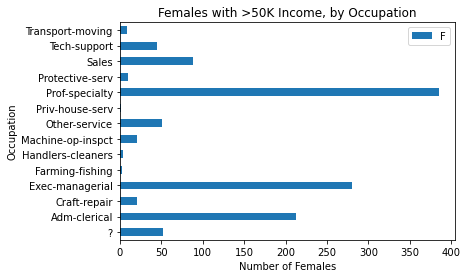

In [113]:
# b) When a person makes more than $50k, what is the relationship between gender and occupation?
# Females >50K
df = adults[['sex', 'occupation']][(adults['sex'] == 'Female') & (adults['income'] == '>50K')]
df = df.groupby('occupation').count()
df.plot.barh()
plt.title("Females with >50K Income, by Occupation")
plt.xlabel("Number of Females")
plt.ylabel("Occupation")
plt.legend("F")

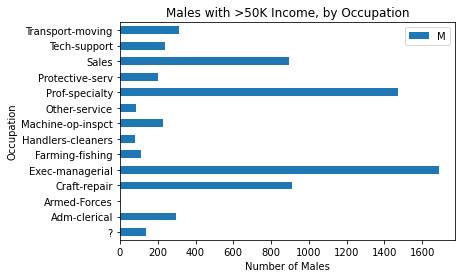

In [114]:
# Males >50K
df = adults[['sex', 'occupation']][(adults['sex'] == 'Male') & (adults['income'] == '>50K')]
df = df.groupby('occupation').count()
df.plot.barh()
plt.title("Males with >50K Income, by Occupation")
plt.xlabel("Number of Males")
plt.ylabel("Occupation")
plt.legend("M")

Looking at the two charts above for people who make more than 50k, we can see the occupations differ for each gender. More females have the profession of Prof-speciality while more males have the occupation of Exec-managerial.

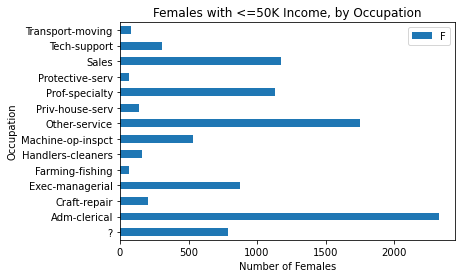

In [115]:
# What about for less?
# Females <=50K
df = adults[['sex', 'occupation']][(adults['sex'] == 'Female') & (adults['income'] == '<=50K')]
df = df.groupby('occupation').count()
df.plot.barh()
plt.title("Females with <=50K Income, by Occupation")
plt.xlabel("Number of Females")
plt.ylabel("Occupation")
plt.legend("F")

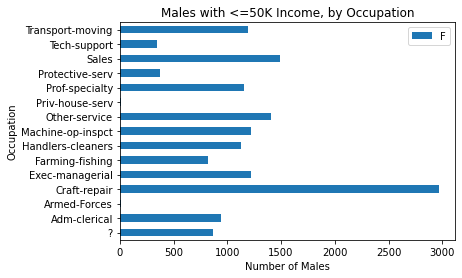

In [116]:
# Males <=50K
df = adults[['sex', 'occupation']][(adults['sex'] == 'Male') & (adults['income'] == '<=50K')]
df = df.groupby('occupation').count()
df.plot.barh()
plt.title("Males with <=50K Income, by Occupation")
plt.xlabel("Number of Males")
plt.ylabel("Occupation")
plt.legend("F")

Looking at the 2 charts above for incomes <=50k, males are more often in Craft-repair while females have higher counts in Adm-clerical.

In [99]:
# c) What are the “richest” professions in each possible native country?
# Need to find occupations with income >50k for each country
df = adults[['native-country', 'occupation', 'income']][adults['income'] == '>50K']
x = df.groupby(['native-country', 'occupation']).count()
xcount = x.sort_values(by = 'income', ascending = False)
xcount.head(50)

income
native-country occupation               
United-States  Exec-managerial      1818
               Prof-specialty       1650
               Sales                 928
               Craft-repair          860
               Adm-clerical          458
               Transport-moving      305
               Tech-support          257
               Machine-op-inspct     224
               Protective-serv       203
               ?                     176
               Farming-fishing       111
               Other-service         106
               Handlers-cleaners      73
?              Prof-specialty         48
               Exec-managerial        31
India          Prof-specialty         25
?              Craft-repair           21
Philippines    Prof-specialty         20
Germany        Prof-specialty         15
Philippines    Adm-clerical           14
?              Sales                  13
Taiwan         Prof-specialty         13
Japan          Exec-managerial        13
China          Prof-specialty         11
England        Exec-managerial        10
?              Adm-clerical            9
Iran           Prof-specialty          8
England        Prof-specialty          8
Canada         Exec-managerial         8
India          Exec-managerial         8
Canada         Prof-specialty          8
Italy          Prof-specialty          7
Germany        Exec-managerial         7
Mexico         Craft-repair            7
Cuba           Exec-managerial         7
Taiwan         Exec-managerial         6
Mexico         Sales                   6
Germany        Craft-repair            6
Cuba           Prof-specialty          6
Canada         Sales                   6
Greece         Exec-managerial         6
China          Exec-managerial         6
?              Tech-support            5
Italy          Adm-clerical            5
               Exec-managerial         5
Germany        Adm-clerical            5
Puerto-Rico    Exec-managerial         5
France         Exec-managerial         5
?              Other-service           5
Philippines    Craft-repair            5

The chart above shows which occupations have the most incomes over 50k. Their native countries are listed with them, but the chart is not necessarily organized by country and many show up more than once for this reason. From the chart we can see that Exec-managerial, Prof-specialty, and Sales are the 'richest' occupations and all lie in the United States.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

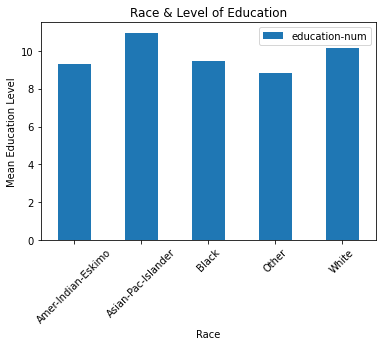

In [92]:
# d) What is the relationship between race and level of education?
df = adults[['race', 'education-num']]
x = adults['race']
y = adults['education-num']
plot1 = adults.groupby('race')[['race', 'education-num']].mean()
plot1.plot.bar(xlabel = 'Race', ylabel = 'Mean Education Level', title = 'Race & Level of Education')
plt.xticks(rotation=45)

Looking at the mean education level for each race, it seems Asian-Pac-Islander has the highest education level, followed by white, American-Indian-Eskimo and Black, then Other.

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

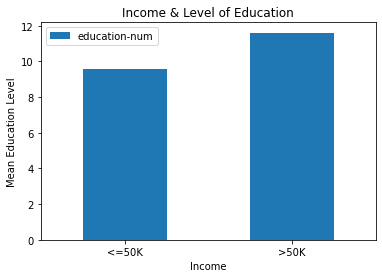

In [93]:
# d) Does it further seem to relate to whether a person makes more than $50k?
df = adults[['income', 'education-num']]
x = adults['income']
y = adults['education-num']
plot1 = adults.groupby('income')[['income', 'education-num']].mean()
plot1.plot.bar(xlabel = 'Income', ylabel = 'Mean Education Level', title = 'Income & Level of Education')
plt.xticks(rotation=0)

As expected, those with more education tend to have a higher income level. 